In [1]:
import numpy as np
import random
import os
import sys
import pandas as pd
from pandas import read_table, read_csv
import matplotlib.pyplot as plt
import seaborn as sb
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

First let's load the data to a varible named "data_set" in a way it understand that values represented as '?' are meant to be understood as NaN (meaning it's missing data).

In [2]:
# read the csv table using Pandas
# identify missing values as ?
data_set = pd.read_csv('hcc_dataset.csv', na_values=['?'], sep=",")
data_set_disposable = pd.read_csv('hcc_dataset.csv', na_values=['?'], sep=",")
# read_csv understand "None" value as being "NaN" so we have to replace every "NaN" value in Ascites and Encephalopathy to "None"
data_set.loc[data_set_disposable["Ascites"].isnull(),"Ascites"] = "None" 
data_set.loc[data_set_disposable["Encephalopathy"].isnull(),"Encephalopathy"] = "None" 
data_set_disposable.loc[data_set_disposable["Ascites"].isnull(),"Ascites"] = "None"
data_set_disposable.loc[data_set_disposable["Encephalopathy"].isnull(),"Encephalopathy"] = "None"


To get an idea of what we're analizing let's show the table loaded to data_set.

In [4]:
#pd.set_option('display.max_rows', 10)  # Set to display 170 rows
#pd.set_option('display.max_columns', 20)  # Set to display 50 columns
pd.reset_option('display.max_columns')  # Set to display 50 columns
pd.reset_option('display.max_columns')  # Set to display 50 columns

# show the table
data_set

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,...,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,Lives
161,Female,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,...,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,Dies


In [31]:
data_set.shape

(165, 50)

By the given table we understand that we have **165** cases each **50** features (variables/columns) being analized.

Now let's see how mamy cases have **no missing data**.

In [178]:
data_set_noNullValues = data_set_disposable
data_set_noNullValues.dropna(inplace=True)
data_set_noNullValues 

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
15,Female,No,Yes,No,No,No,No,Yes,No,No,...,176.0,5.0,0.80,2.0,2.6,1.3,25.0,13.0,60.0,Lives
28,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,293.0,7.7,0.67,2.0,6.5,0.4,94.0,27.0,70.0,Dies
61,Male,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,...,207.0,6.3,0.69,1.0,3.0,1.9,224.0,95.0,363.0,Lives
67,Male,Yes,Yes,No,No,Yes,No,Yes,No,No,...,113.0,37.0,0.40,1.0,2.7,0.2,94.0,37.0,48.0,Lives
90,Male,Yes,Yes,No,No,No,No,Yes,No,No,...,177.0,6.8,0.70,3.0,3.5,1.0,37.0,11.0,173.0,Dies
108,Male,Yes,Yes,No,No,No,No,Yes,No,No,...,163.0,6.1,0.67,5.0,20.0,0.5,131.0,78.0,1316.0,Dies
122,Male,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,...,363.0,7.3,0.55,1.0,4.0,1.5,40.0,12.0,57.0,Dies


In [ ]:
#Column: (number of Non-Null elements, data type)
data_set.info()

In [ ]:
# name of columns
data_set.columns

The **describe()** function only gives us data from columns containing numerical values, thus showing only 23 columns.

In [ ]:
data_set.describe()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
count,165.000000,117.000000,112.000000,161.000000,1.570000e+02,162.000000,162.000000,162.000000,162.000000,159.000000,...,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000
mean,64.690909,71.008547,20.464286,1.421851,1.929995e+04,12.879012,95.119753,1473.961549,113206.442654,3.445535,...,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647
std,13.319534,76.277680,51.565130,0.477816,1.490983e+05,2.145237,8.405846,2909.106006,107118.632481,0.685132,...,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454
min,20.000000,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,...,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,1.170000,5.200000e+00,11.425000,89.775000,5.100000,255.750000,3.000000,...,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000
50%,66.000000,75.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,...,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000
75%,74.000000,100.000000,30.500000,1.530000,6.150000e+02,14.600000,100.675000,19.525000,171500.000000,4.050000,...,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000
max,93.000000,500.000000,510.000000,4.820000,1.810346e+06,18.700000,119.600000,13000.000000,459000.000000,4.900000,...,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000


Let's analize each column with **numerical** data type by creating **density** graphs that represent each of them.

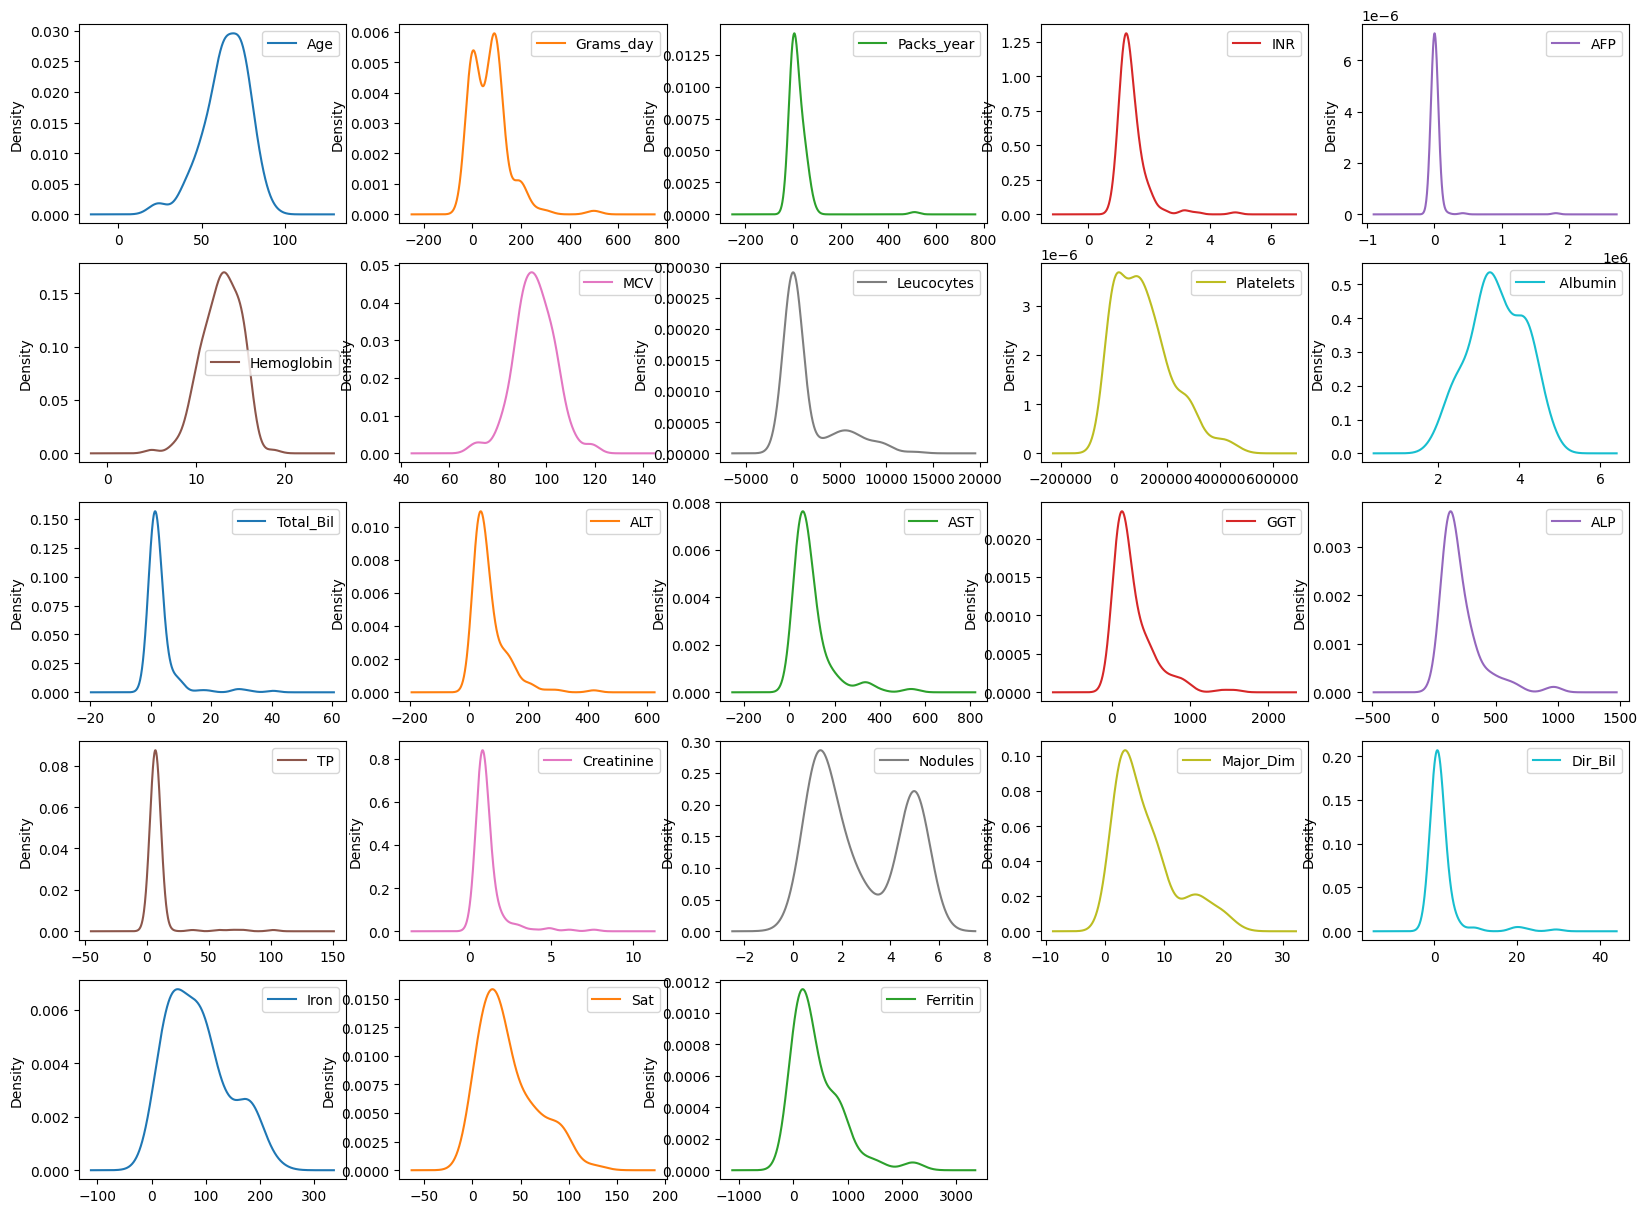

In [ ]:
#only shows columns with numerical values
data_set.plot(kind='density', subplots=True, layout=(5, 5), figsize=(20, 15), sharex=False)
plt.show()

Now let's plot each column with **numerical** data type while also taking into account the **"Class"** that each case falls into by creating **violin plots** that represent each of them.

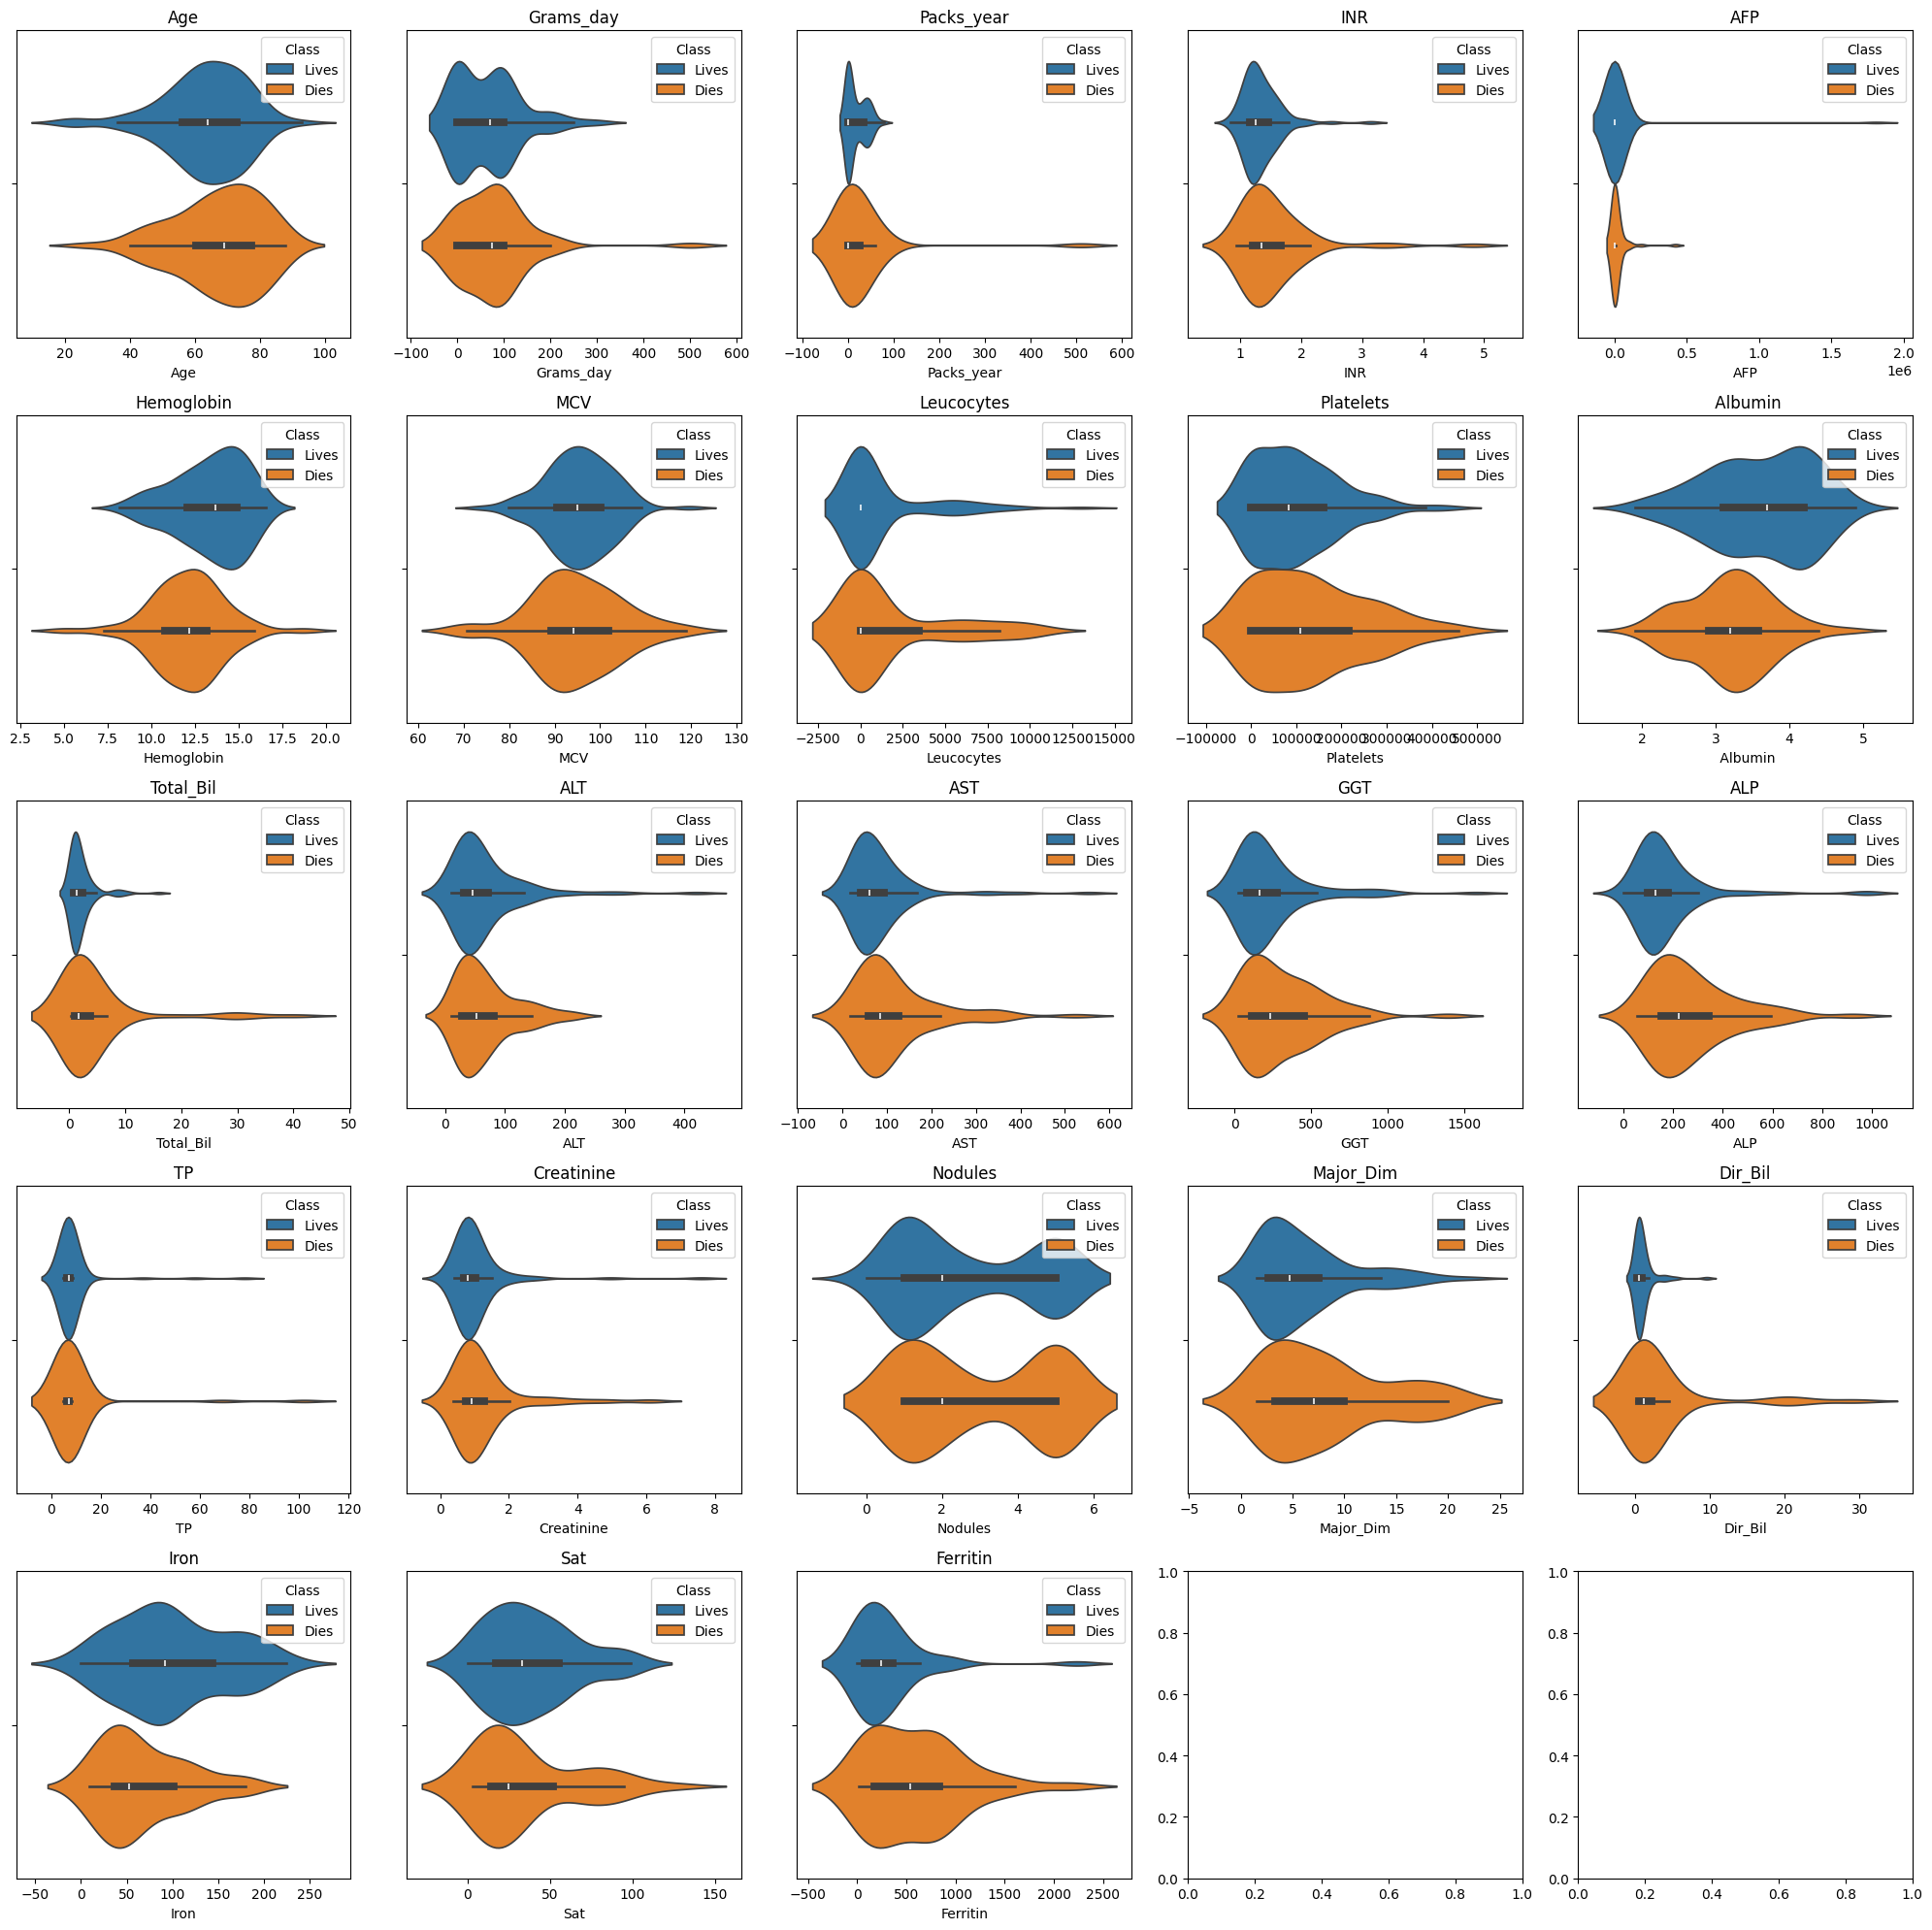

In [24]:
numerical_columns = data_set.select_dtypes(include=[int,float])

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Plot count plots with hue for object columns using Seaborn
for idx, column in enumerate(numerical_columns.columns):
    #sb.countplot(data=data_set, x=column, hue="Class", ax=axes.flatten()[idx])
    sb.violinplot(x = column, hue="Class", data = data_set,ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Now let's represent them in a **scatter** kind of plot.

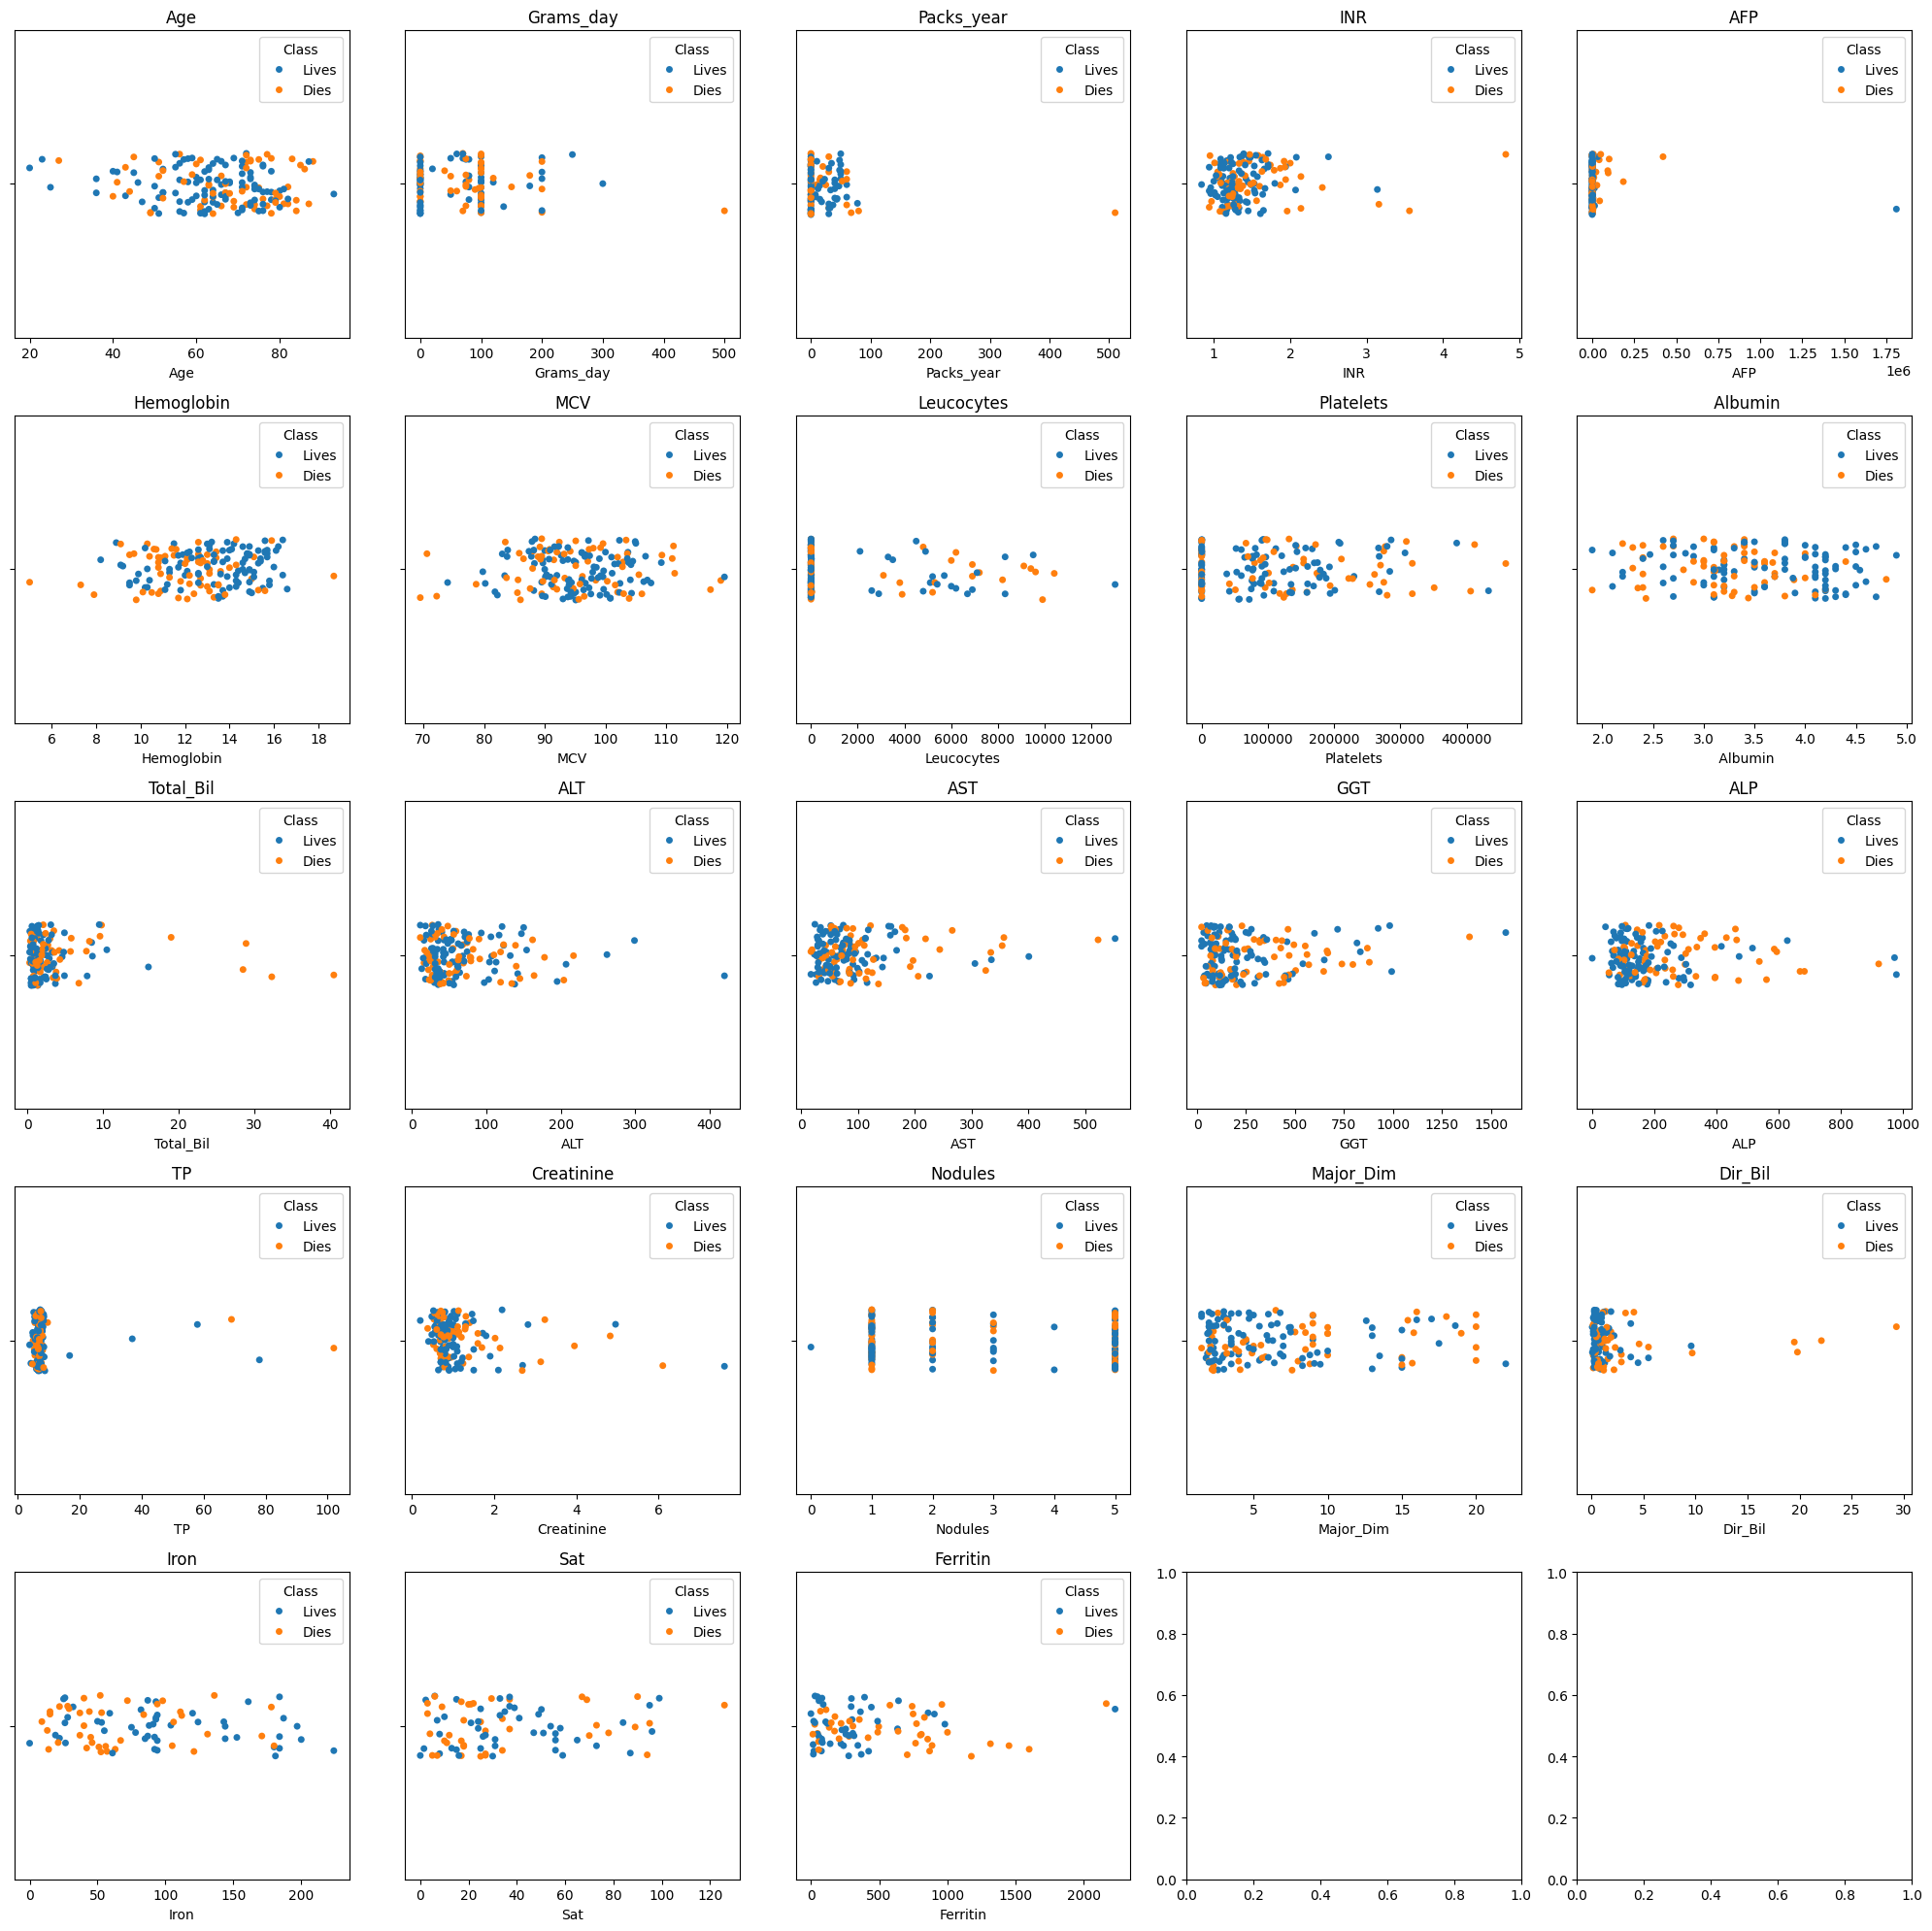

In [27]:
numerical_columns = data_set.select_dtypes(include=[int,float])

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Plot count plots with hue for object columns using Seaborn
for idx, column in enumerate(numerical_columns.columns):
    #sb.countplot(data=data_set, x=column, hue="Class", ax=axes.flatten()[idx])
    sb.stripplot(x = column, hue="Class", data = data_set,ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Let's analize each column with **object** data type by creating **pie** graphs that represent each of them.

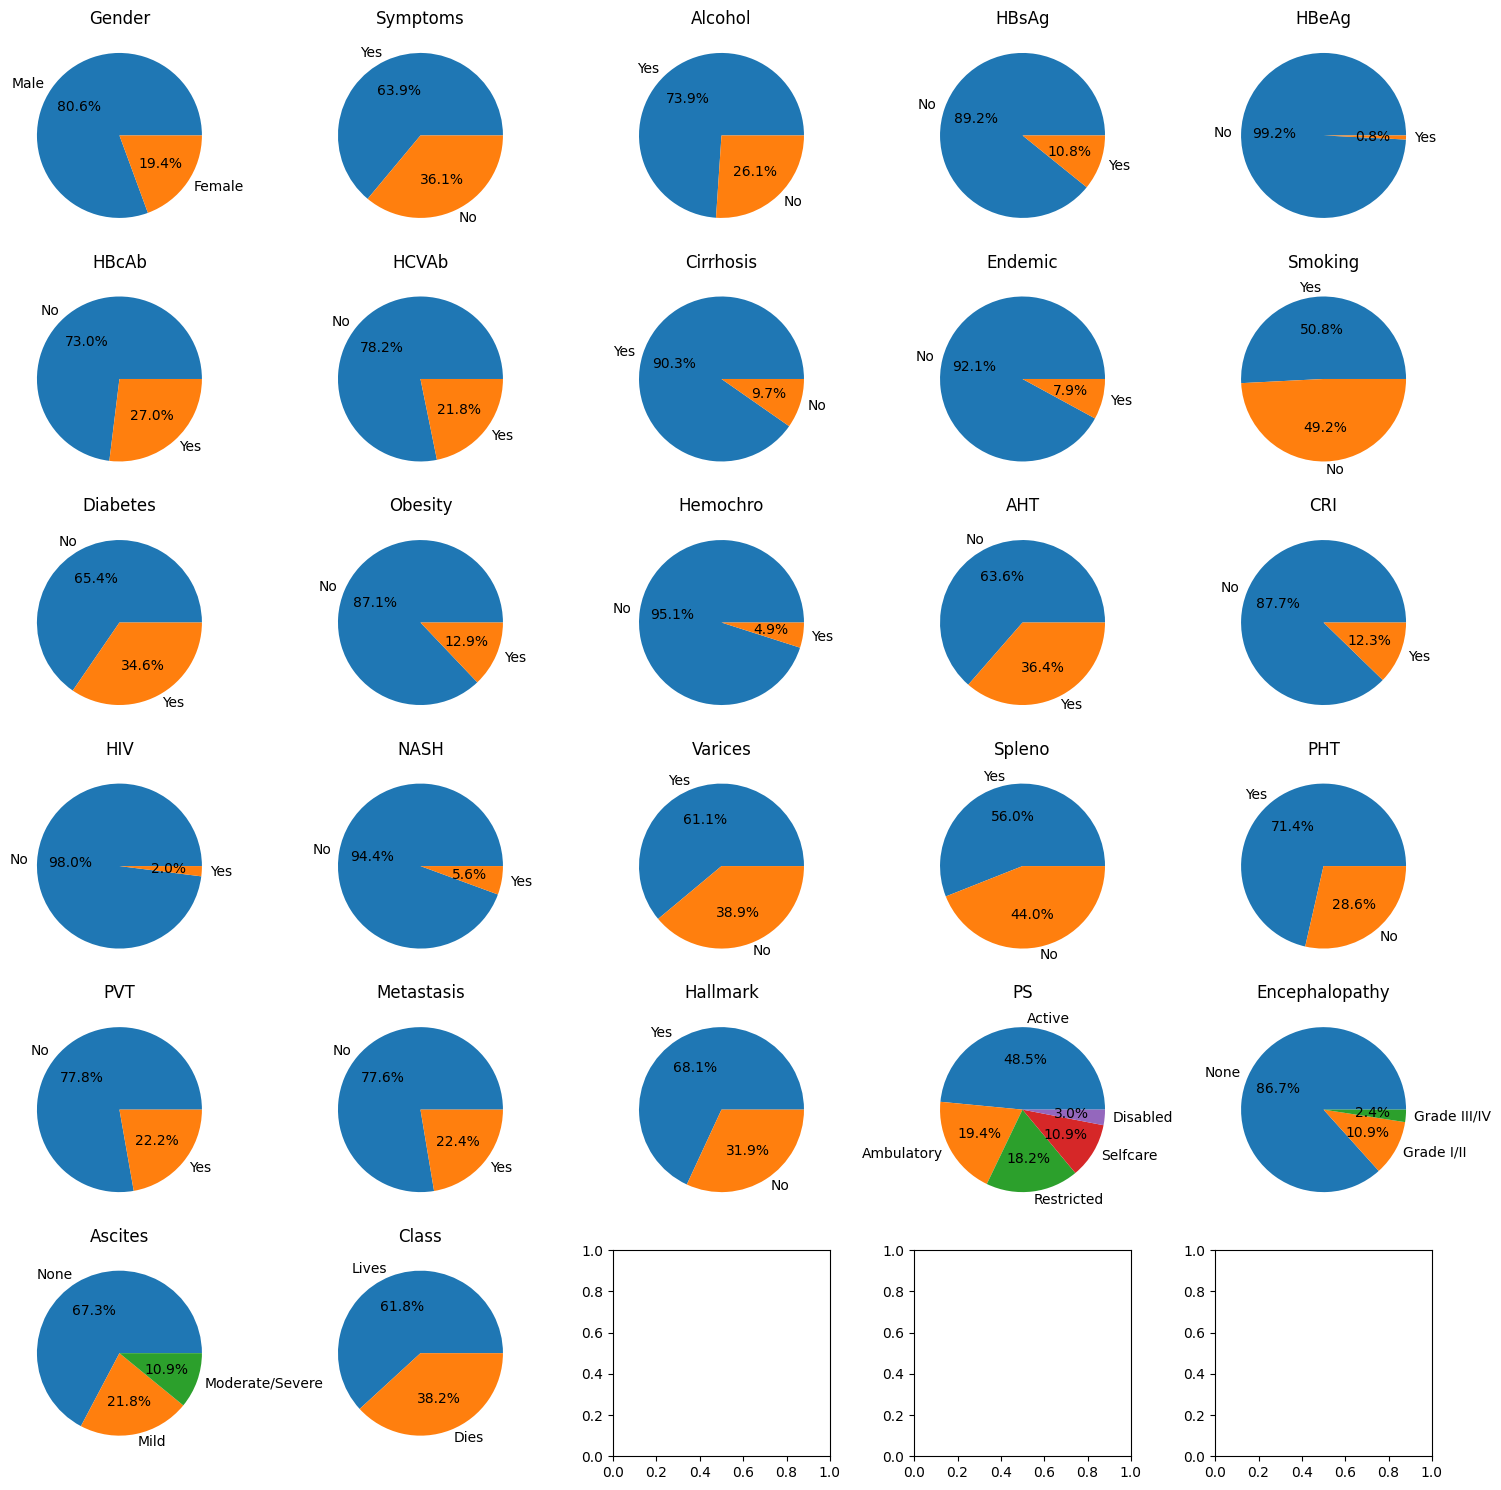

In [10]:
object_columns = data_set.select_dtypes(include=object)

# Create subplots
num_cols = len(object_columns.columns)
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

# Plot pie charts for object columns
for idx, column in enumerate(object_columns.columns):
    counts = object_columns[column].value_counts()
    axes.flatten()[idx].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Now let's plot each column with **object** data type while also taking into account the **"Class"** that each case falls into by creating **count plots** that represent each of them.

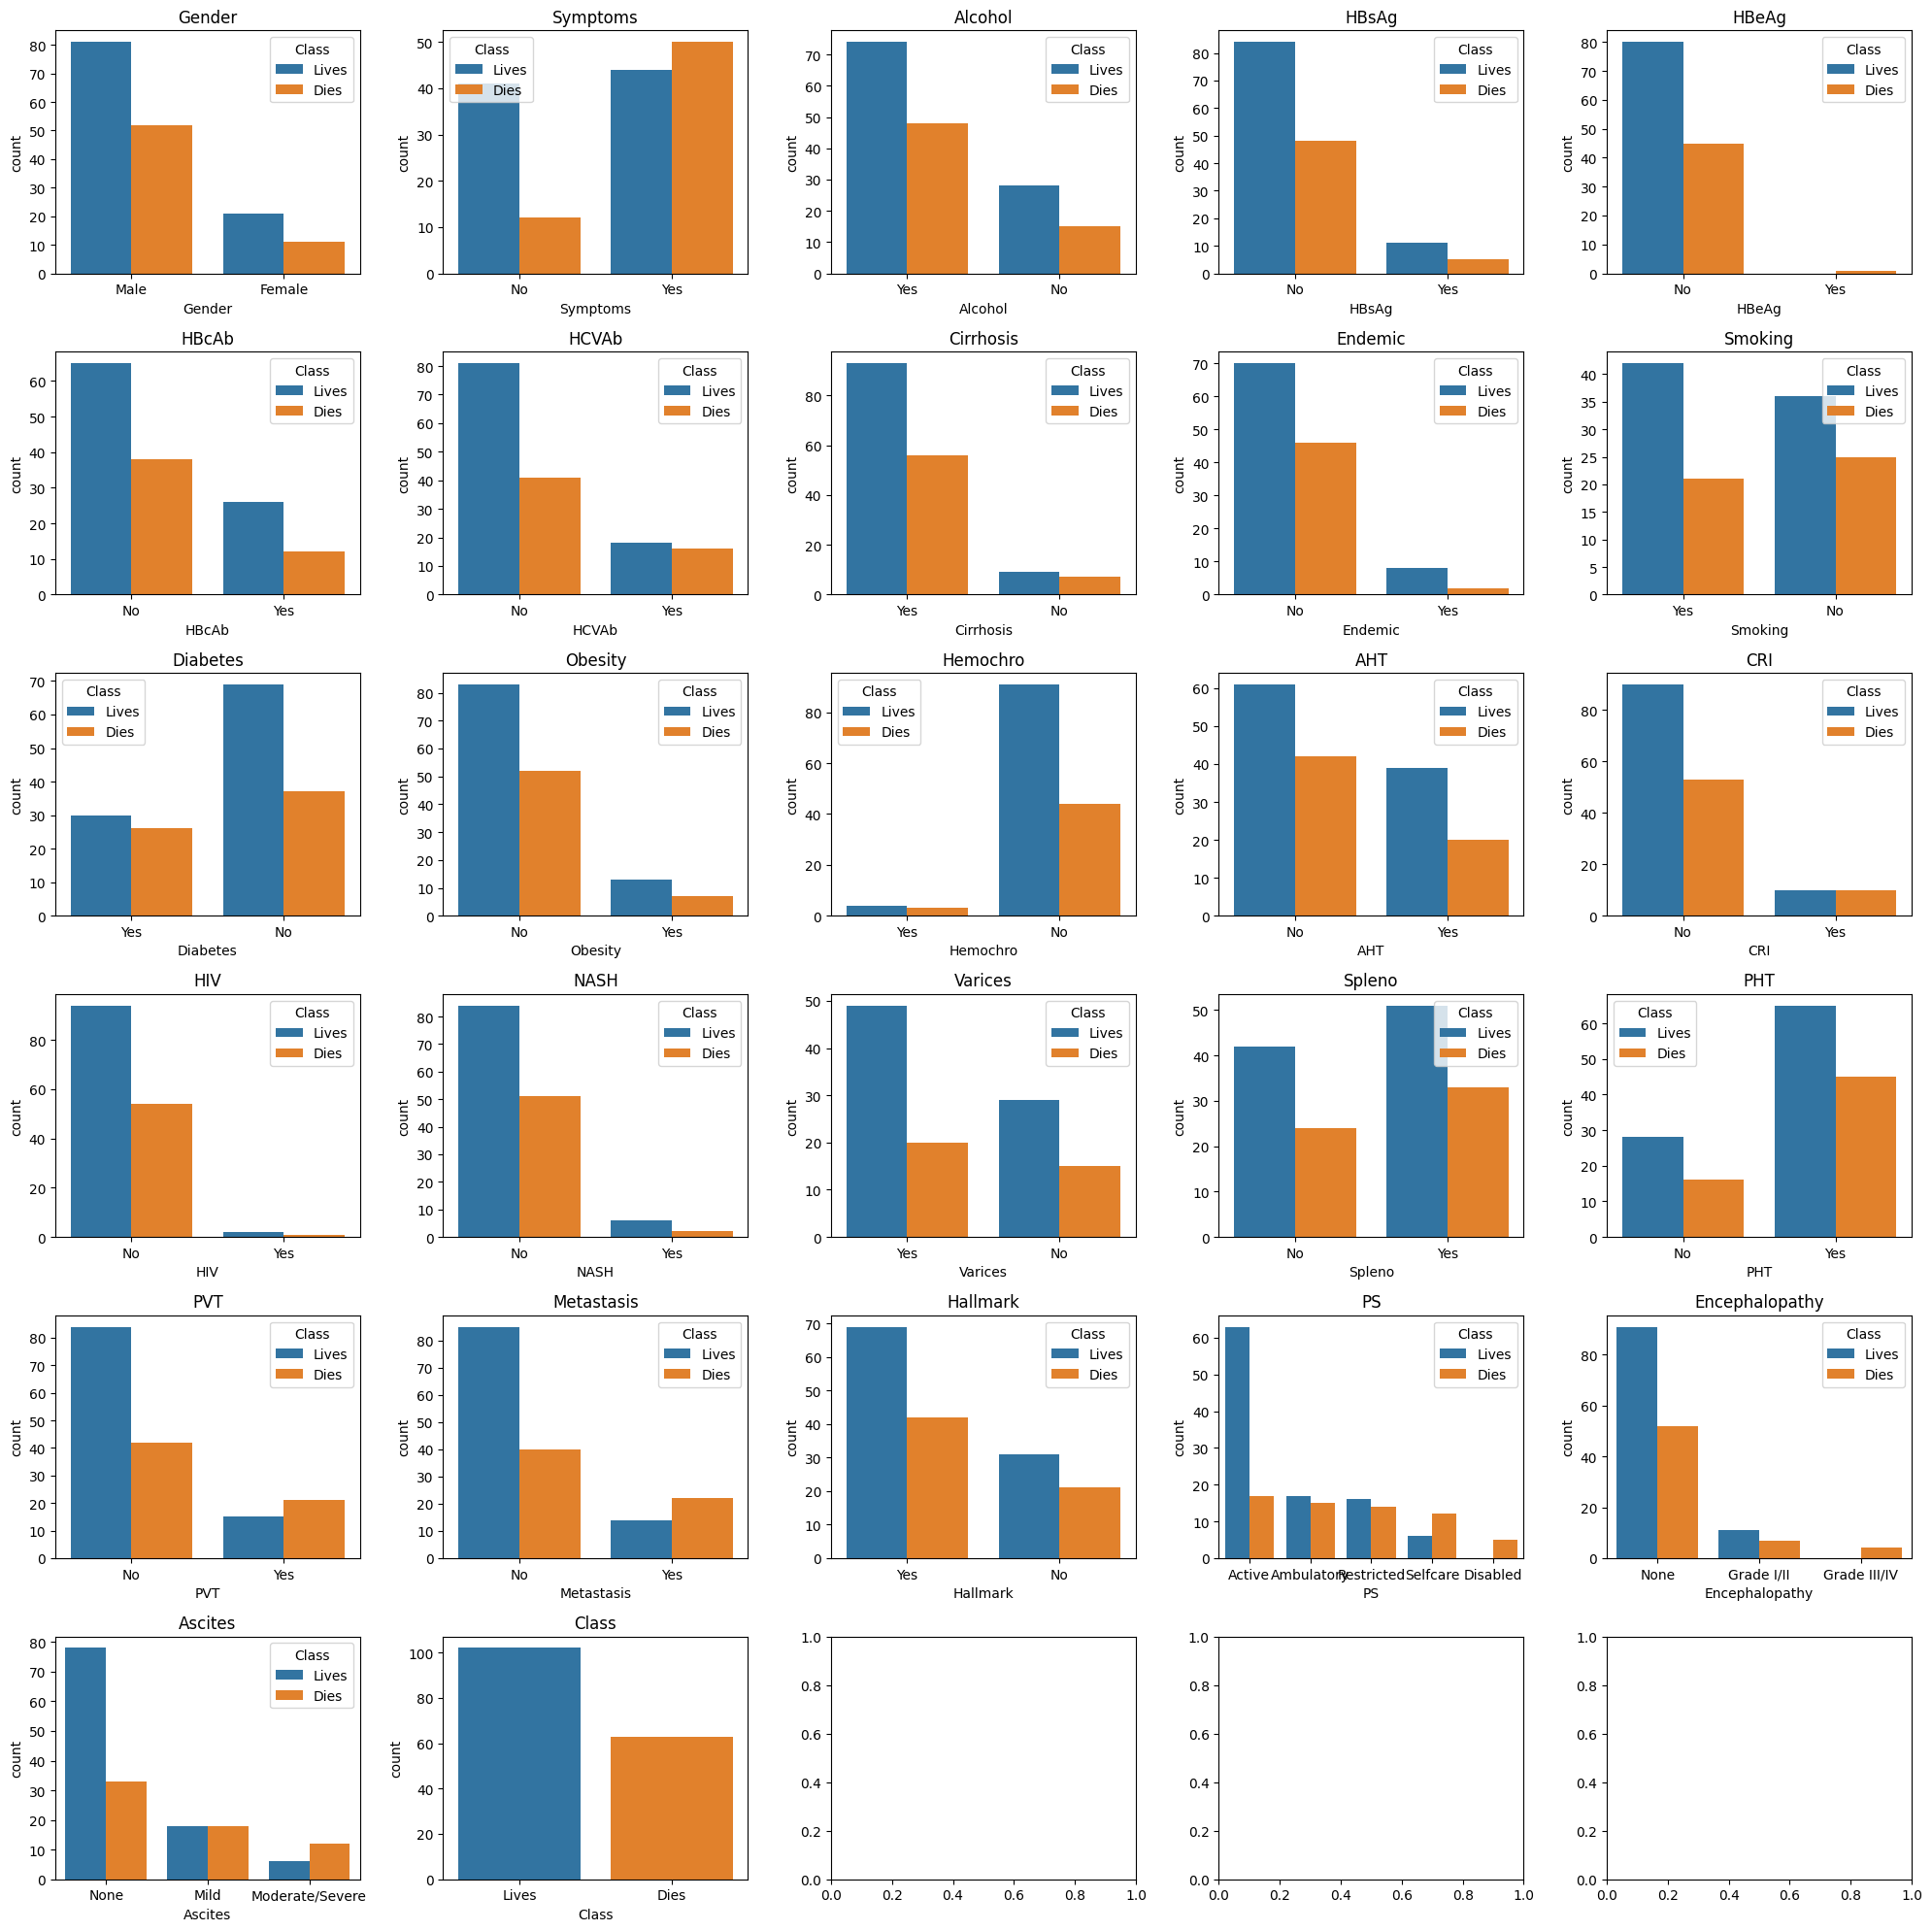

In [14]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))

# Plot count plots with hue for object columns using Seaborn
for idx, column in enumerate(object_columns.columns):
    sb.countplot(data=object_columns, x=column, hue="Class", ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Plotting function takes a long time to render due to too much data (165 rows, 50 columns) and the fact that there are so **many columns** to analize that the subplots end up being to small to fit on screen.
Not to mention that **most of the cases** have at least one column as "NaN" not being rendered into the graphs.
Therefore, some **columns need to be filtered or discarded** and we have to find a way to **turn every "NaN" value** into something that can be considered **average**.

In [ ]:
# We have to temporarily drop the rows with 'NA' values because the Seaborn plotting function does not know what to do with them
sb.pairplot(data_set.dropna(), hue='Class',height=20, aspect=1)

Comparing 2 columns with sns.relplot() takes way less time.

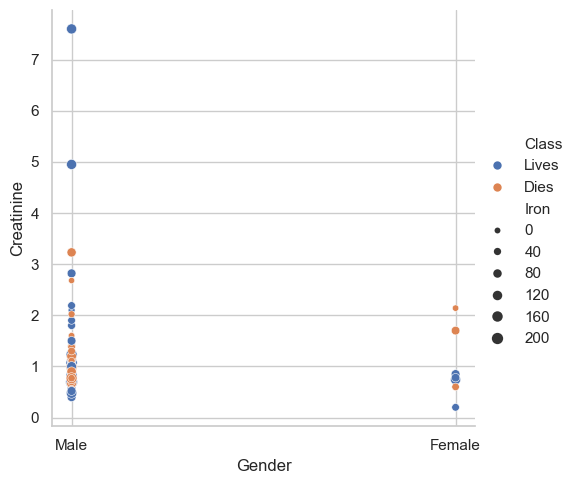

In [29]:
# Include Seaborn for some graphics
sb.set(style = "whitegrid")
# scatter plot: joint distribution of two variables (hue and size are optional)
sb.relplot(x = "Gender", y = "Creatinine",hue="Class",size="Iron", data = data_set)

Class
Lives    102
Dies      63
Name: count, dtype: int64

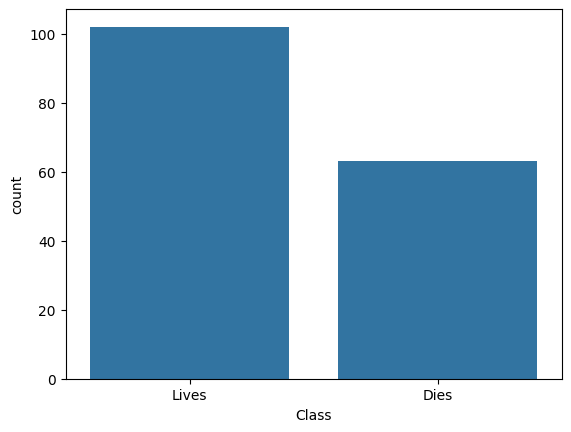

In [33]:
sb.countplot(x="Class",data = data_set)
data_set["Class"].value_counts()

In [34]:
#show the correlation between numerical data
data_set.corr(numeric_only=True)

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
Age,1.000000,0.183121,0.073134,-0.046168,-0.019466,-0.054819,0.030143,0.067614,0.138528,0.044818,...,-0.019619,-0.147008,0.019931,0.201739,-0.058853,0.097089,-0.129574,-0.204497,-0.128684,-0.126240
Grams_day,0.183121,1.000000,0.032797,0.248619,0.010632,-0.051152,0.196461,0.205486,-0.055498,-0.161292,...,0.088375,-0.051747,-0.014448,-0.034584,0.118342,-0.167658,-0.093898,0.138758,0.161343,0.111783
Packs_year,0.073134,0.032797,1.000000,0.000806,0.044466,0.004283,0.041310,-0.001543,0.127653,0.072234,...,-0.001726,-0.069290,0.007329,0.011810,-0.053572,0.017760,0.115566,-0.053890,-0.099083,-0.077329
INR,-0.046168,0.248619,0.000806,1.000000,-0.070148,-0.259745,0.249306,-0.048452,-0.025113,-0.310947,...,-0.052727,-0.020114,-0.012628,-0.040311,-0.067421,-0.128296,0.202651,-0.012782,0.141752,0.166140
AFP,-0.019466,0.010632,0.044466,-0.070148,1.000000,0.029370,0.043836,0.176578,0.278964,-0.012888,...,0.421741,0.115820,-0.026230,-0.040707,0.099491,0.199720,-0.015181,-0.151413,-0.150607,0.052818
Hemoglobin,-0.054819,-0.051152,0.004283,-0.259745,0.029370,1.000000,0.186301,-0.031346,0.056703,0.423094,...,-0.117483,-0.223791,-0.038580,-0.039437,-0.033876,-0.086522,-0.097762,0.442291,0.248818,0.016076
MCV,0.030143,0.196461,0.041310,0.249306,0.043836,0.186301,1.000000,-0.041546,-0.141839,-0.141469,...,-0.039583,-0.188092,-0.069177,-0.022570,-0.012209,-0.217376,0.137208,0.438645,0.545314,0.366653
Leucocytes,0.067614,0.205486,-0.001543,-0.048452,0.176578,-0.031346,-0.041546,1.000000,0.300943,-0.020359,...,0.194662,0.233025,0.189944,-0.022645,0.018951,0.140751,0.134656,-0.094336,-0.087698,0.133311
Platelets,0.138528,-0.055498,0.127653,-0.025113,0.278964,0.056703,-0.141839,0.300943,1.000000,0.074543,...,0.286961,0.260947,0.039629,0.064005,0.093433,0.264893,0.230990,-0.206895,-0.180887,0.073555
Albumin,0.044818,-0.161292,0.072234,-0.310947,-0.012888,0.423094,-0.141469,-0.020359,0.074543,1.000000,...,-0.019260,-0.232622,0.032368,-0.021784,-0.140097,0.080912,-0.210340,0.114884,-0.168194,-0.103952
